# Lab 8 : Star Formation 

In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [2]:
def StarFormationRate(L, type, TIR=0):
    '''
    Function that computes the str formation rate of a galaxy
    following Kennicutt & Evans 2012 Eqn 12 (ARA&A 50)
    Parameters:
        L: (float) Luminosity of the galaxy in the given waveband (erg/s)
        type: (string) The wavelength, one of 'FUV', 'NUV', 'TIR', 'Halpha'
        TIR: (float) Total IR luminosity (erg/s). Default 0
    Returns:
        SFR: (float) log Star Formation Rate (Msun/yr)
    '''
    if type == "FUV":
        logCx = 43.35 # Calibration from Table 1 (K&E 2012)
        TIRc = 0.46 # Correction from Table 2 (...)
    elif type == "NUV":
        logCx = 43.17
        TIRc = 0.27
    elif type == "Halpha":
        logCx = 41.27
        TIRc = 0.0024
    elif type == "TIR":
        logCx = 43.41
        TIRc = 0
    else:
        raise TypeError("Incorrect Wavelength! Correct options: [FUV, NUV, Halpha, TIR]")

    # Correct Luminosity for dust using TIR
    Lnew = L + TIRc * TIR
    # SFR
    SFR = np.log10(Lnew) - logCx
    return SFR

Let's try to reproduce SFRs derived for galaxies from UV luminosities measured with Galex. 

Using Table 1 from Lee et al. 2009
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED:
https://ned.ipac.caltech.edu/

In [12]:
LsunErgS = const.L_sun.to(u.erg/u.s).value

In [ ]:
#  WLM Dwarf Irregular Galaxy


In [ ]:
#  N24 Sc galaxy


# Part B Star formation main sequence

1) Write a function that returns the average SFR of a galaxy at a given redshift. 

2) What is the average SFR of a MW mass galaxy today? at z=1?

3) Plot the SFR main sequence for a few different redshifts from 1e9 to 1e12 Msun.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

# Step 1

In [3]:
def SFRMainSequence(Mstar, z):
    """ Function that computes the aerage SFR of a galaxy
    as a function of the Stellar Mass.

    Inputs:
        MSTAR : float
            stellar mass of the galaxy in Msun

        z : float
            redshift

    Outputs: 
        logSFr : float
            log(SFR (Msun/yr))
    """

    alpha = 0.7 - 0.13 * z
    beta = 0.38 + 1.14 * z - 0.19 * z ** 2
    logSFR = alpha * (np.log10(Mstar) - 10.5) + beta

    return logSFR   

# Step 2

In [17]:
# MW at z=0
MWL = 1e8*LsunErgS
print(10**StarFormationRate(MWL, 0))

TypeError: Incorrect Wavelength! Correct options: [FUV, NUV, Halpha, TIR]

In [ ]:
# MW at z = 1
print(10**StarFormationRate(MWL, 1))

# Step 3

In [4]:
# create an array of stellar masses
Mass = np.linspace(1e9, 1e12)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


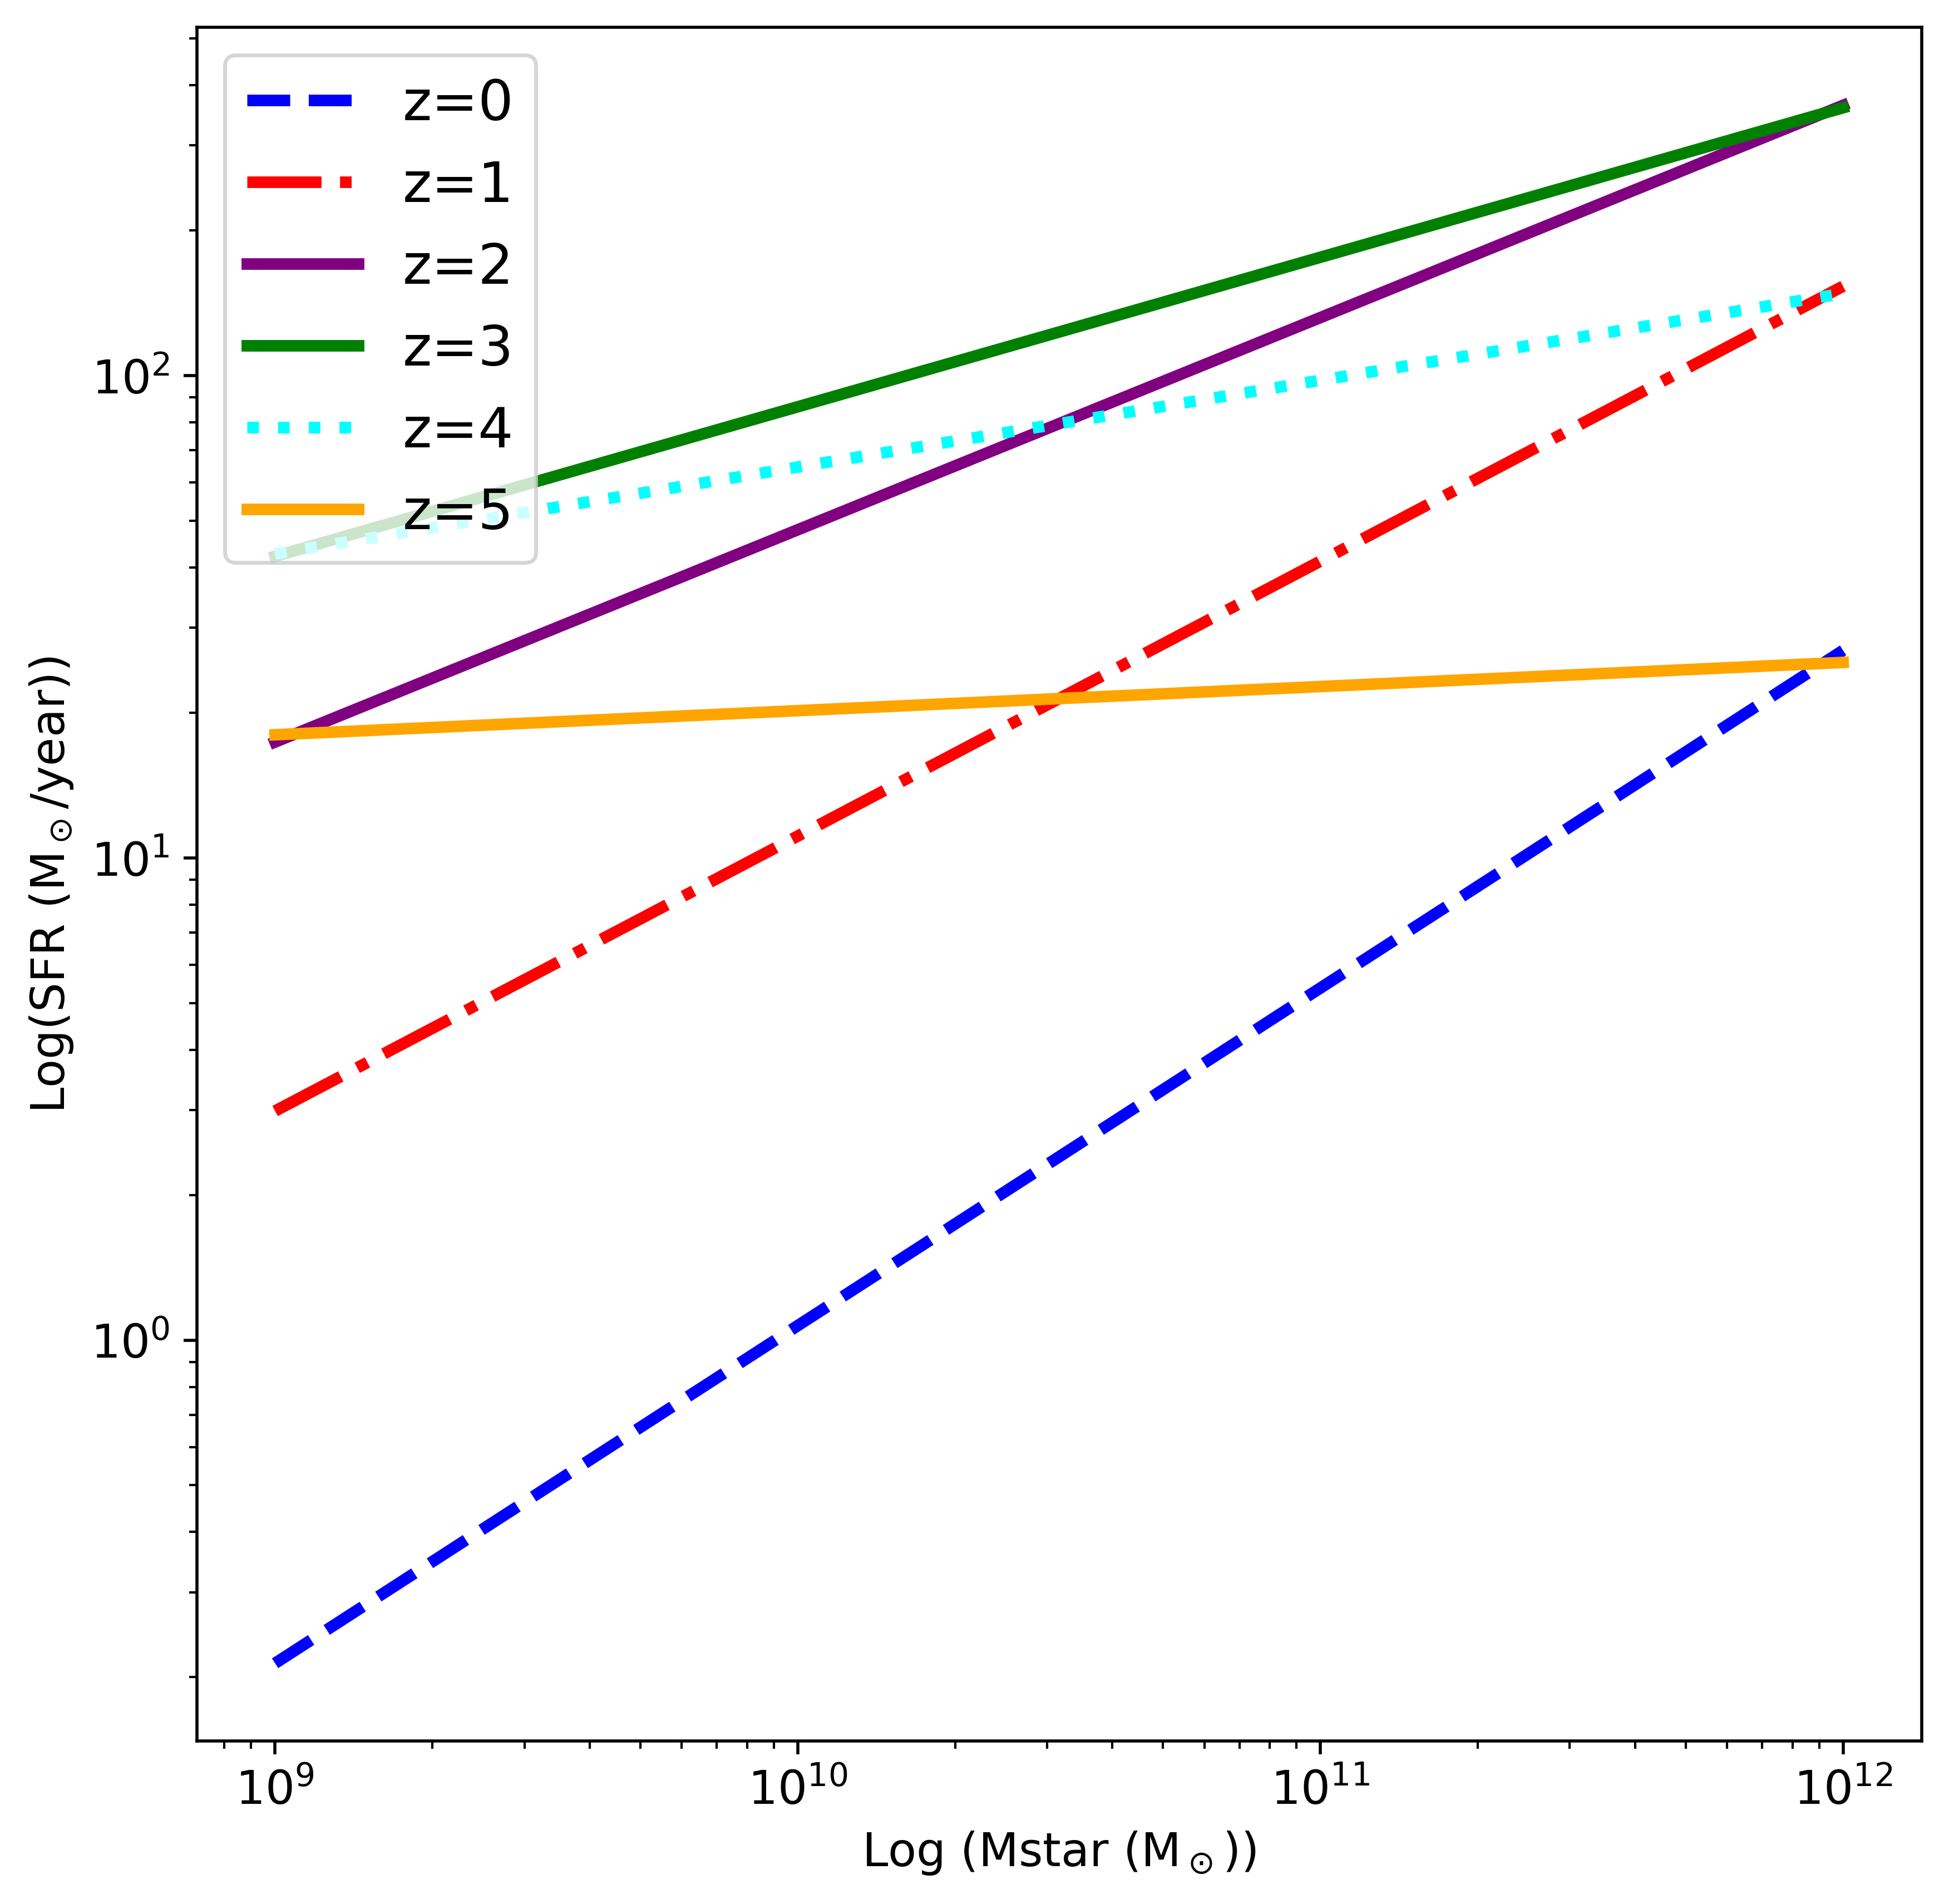

In [11]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.loglog(Mass, 10**SFRMainSequence(Mass, 0), color="blue", linewidth=3, label="z=0", ls="--")
plt.loglog(Mass, 10**SFRMainSequence(Mass, 1), color="red", linewidth=3, label="z=1", ls="-.")
plt.loglog(Mass, 10**SFRMainSequence(Mass, 2), color="purple", linewidth=3, label="z=2")
plt.loglog(Mass, 10**SFRMainSequence(Mass, 3), color="green", linewidth=3, label="z=3", ls="-")
plt.loglog(Mass, 10**SFRMainSequence(Mass, 4), color="cyan", linewidth=3, label="z=4", ls=":")
plt.loglog(Mass, 10**SFRMainSequence(Mass, 5), color="orange", linewidth=3, label="z=5")
#plt.loglog(Mass, 10**SFRMainSequence(Mass, 100), color="black", linewidth=3, label="z=100")
print(10**SFRMainSequence(Mass, 100))



# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Part C  Starbursts

Use your `StarFormationRate` code to determine the typical star formation rates for the following systems with the listed Total Infrared Luminosities (TIR): 

Normal Galaxies: $10^{10}$ L$_\odot$

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [13]:
# normal galaxies 
TIR_Normal = 1e10*LsunErgS
print(10**(StarFormationRate(TIR_Normal, "TIR")))

1.4892648150381245


In [14]:
# LIRGs  
TIR_LIRG = 1e11*LsunErgS
print(10**(StarFormationRate(TIR_LIRG, "TIR")))

14.892648150381245


In [15]:
# ULIRGs
TIR_ULIRG = 1e12*LsunErgS
print(10**(StarFormationRate(TIR_ULIRG, "TIR")))

148.92648150381245


In [16]:
# HLIRGs
TIR_HLIRG = 1e13*LsunErgS
print(10**(StarFormationRate(TIR_HLIRG, "TIR")))

1489.2648150381244
